<a href="https://colab.research.google.com/github/yurez11/Data_project/blob/main/Pixar_film_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('pixar_films new.csv')
print("Первые строки данных:")
print(df.head().rename(index=lambda x: x + 1))



Первые строки данных:
   ID            film film_rating cinema_score release_date  run_time  \
1   1       Toy Story           G            A   1995-11-22        81   
2   2    A Bug's Life           G            A   1998-11-25        95   
3   3     Toy Story 2           G           A+   1999-11-24        92   
4   4  Monsters, Inc.           G           A+   2001-11-02        92   
5   5    Finding Nemo           G           A+   2003-05-30       100   

      budget  box_office_us_canada  box_office_other  box_office_worldwide  \
1   30000000             223225679         171210907             394436586   
2  120000000             162798565         200460294             363258859   
3   90000000             245852179         265506097             511358276   
4  115000000             255873250         272900000             528773250   
5   94000000             339714978         531300000             871014978   

   rotten_tomatoes_score  rotten_tomatoes_counts  metacritic_score  \


# График 1: Линейный график кассовых сборов по годам (мировые сборы)

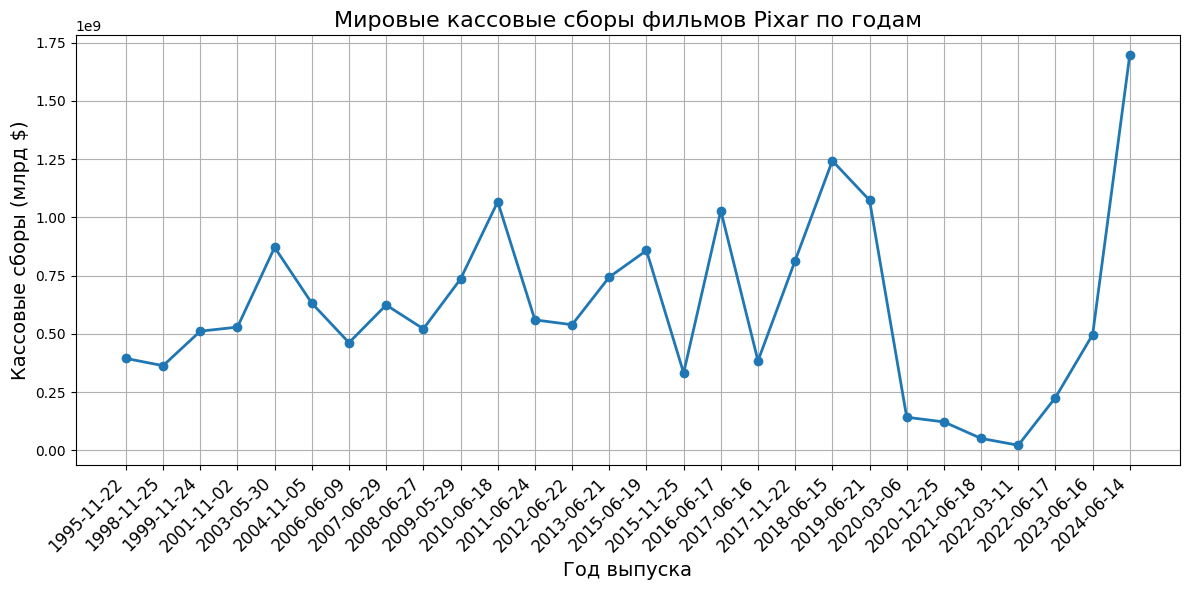

In [ ]:
colors = ['#1f77b4', '#2ca02c', '#17becf', '#7f7f7f', '#bcbd22', '#8c564b']


plt.figure(figsize=(12, 6))
plt.plot(df['release_date'], df['box_office_worldwide'], marker='o', color=colors[0], linestyle='-', linewidth=2)
plt.title('Мировые кассовые сборы фильмов Pixar по годам', fontsize=16)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Кассовые сборы (млрд $)', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# График 2: Точечный график сравнения оценок Rotten Tomatoes и IMDb

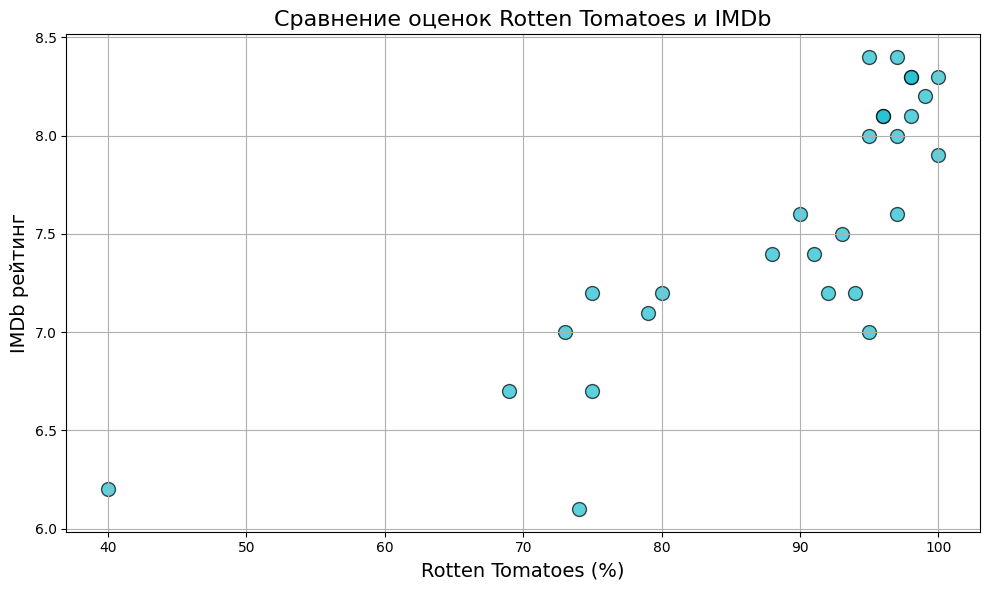

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['rotten_tomatoes_score'], df['imdb_score'], color=colors[2], s=100, edgecolor='black', alpha=0.7)
plt.title('Сравнение оценок Rotten Tomatoes и IMDb', fontsize=16)
plt.xlabel('Rotten Tomatoes (%)', fontsize=14)
plt.ylabel('IMDb рейтинг', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# График 3: Круговая диаграмма распределения сборов

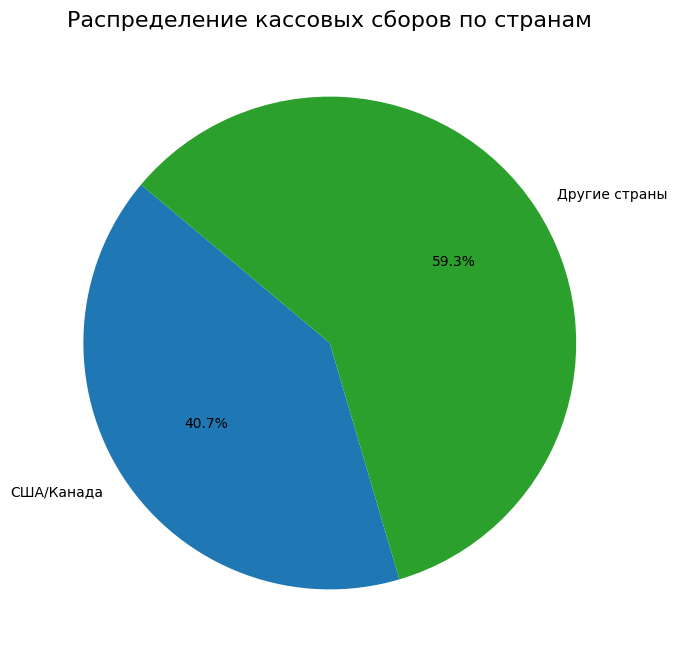

In [ ]:
total_us_canada = df['box_office_us_canada'].sum()
total_other = df['box_office_other'].sum()
plt.figure(figsize=(8, 8))
plt.pie([total_us_canada, total_other], labels=['США/Канада', 'Другие страны'], autopct='%1.1f%%', startangle=140, colors=[colors[0], colors[1]])
plt.title('Распределение кассовых сборов по странам', fontsize=16)
plt.show()

# График 4: Сравнение бюджета и мировых кассовых сборов

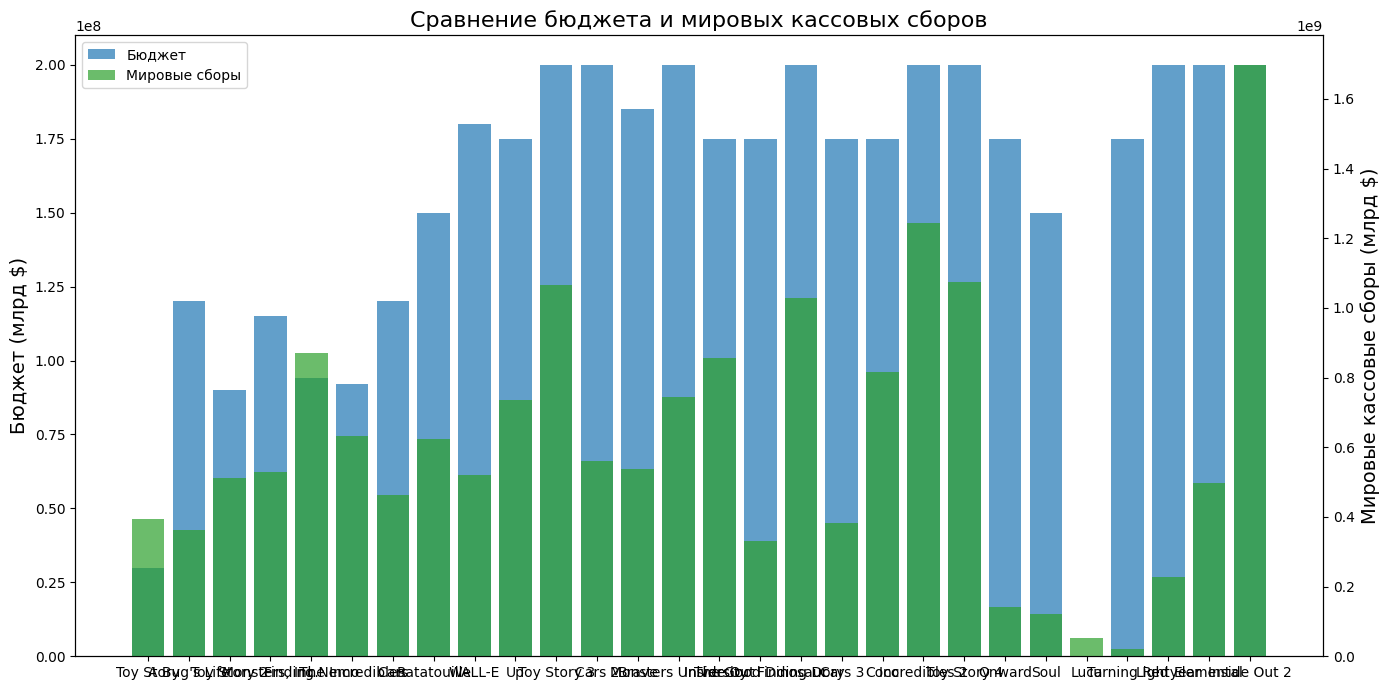

In [ ]:

fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.bar(df['film'], df['budget'], color=colors[0], alpha=0.7, label='Бюджет')
ax1.set_ylabel('Бюджет (млрд $)', fontsize=14)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.bar(df['film'], df['box_office_worldwide'], color=colors[1], alpha=0.7, label='Мировые сборы')
ax2.set_ylabel('Мировые кассовые сборы (млрд $)', fontsize=14)
ax2.tick_params(axis='y')
plt.title('Сравнение бюджета и мировых кассовых сборов', fontsize=16)
plt.xlabel('Фильм', fontsize=14)
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.tick_params(axis='x', which='major', pad=15)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# График 5: Средние оценки по годам

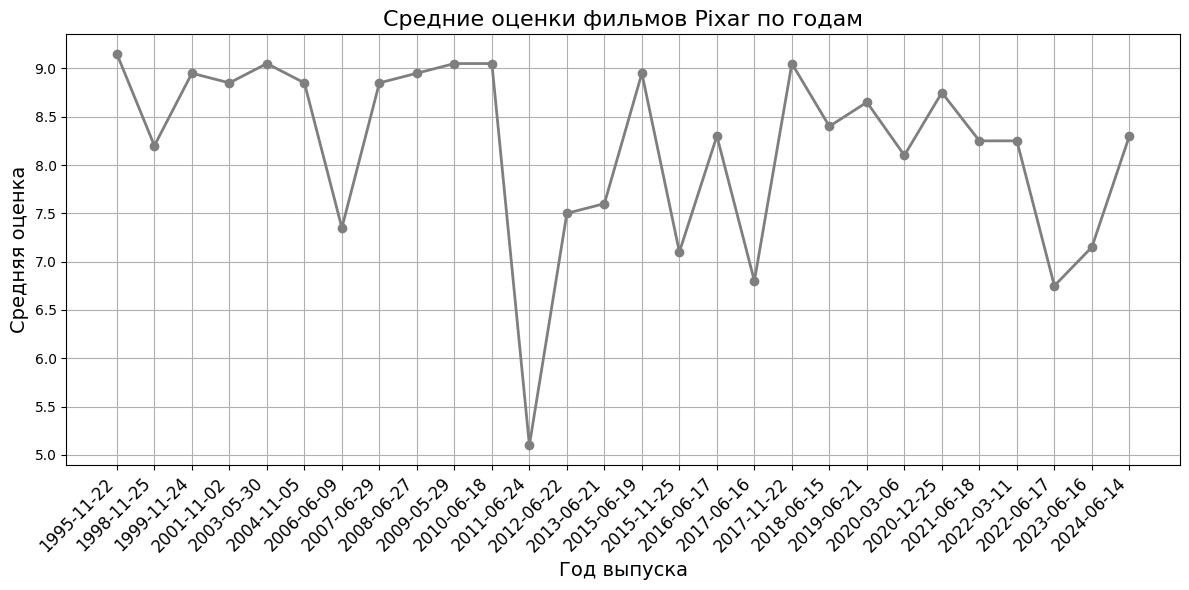

In [ ]:
df['average_rating'] = (df['rotten_tomatoes_score'] / 10 + df['imdb_score']) / 2

plt.figure(figsize=(12, 6))
plt.plot(df['release_date'], df['average_rating'], marker='o', color=colors[3], linestyle='-', linewidth=2)
plt.title('Средние оценки фильмов Pixar по годам', fontsize=16)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Средняя оценка', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# График 6: Связь длительности фильма и мировых кассовых сборов

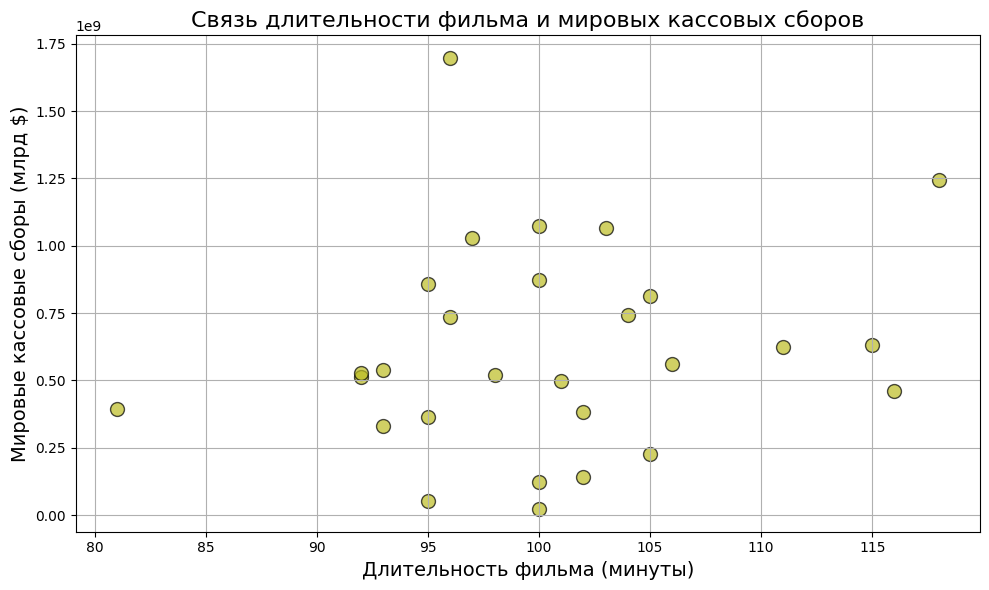

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['run_time'], df['box_office_worldwide'], color=colors[4], s=100, edgecolor='black', alpha=0.7)
plt.title('Связь длительности фильма и мировых кассовых сборов', fontsize=16)
plt.xlabel('Длительность фильма (минуты)', fontsize=14)
plt.ylabel('Мировые кассовые сборы (млрд $)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# График 7: Круговая диаграмма распределения фильмов по возрастным рейтингам G и PG

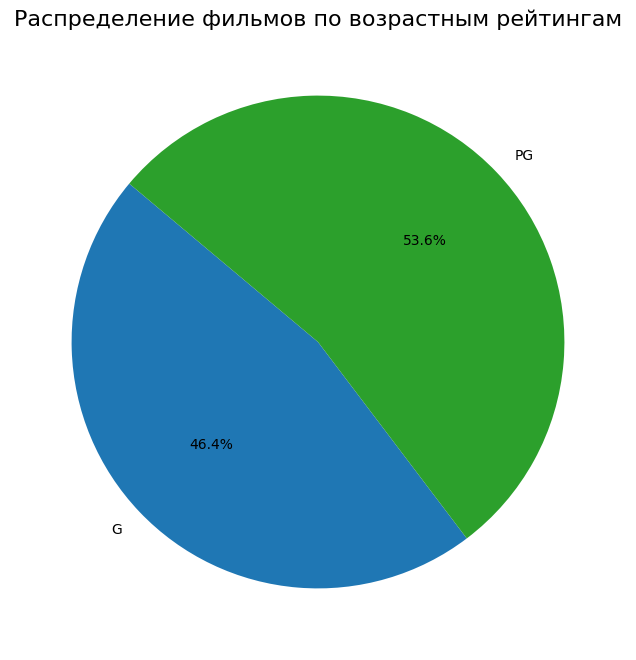

In [ ]:
rating_counts = df['film_rating'].value_counts()
filtered_ratings = rating_counts[['G', 'PG']]
plt.figure(figsize=(8, 8))
plt.pie(filtered_ratings, labels=filtered_ratings.index, autopct='%1.1f%%', startangle=140, colors=[colors[0], colors[1]])
plt.title('Распределение фильмов по возрастным рейтингам', fontsize=16)
plt.show()